<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Iowa Liquor Sales 

---

Project 3, unlike project 2 which combined skills from weeks 1 and 2, will now be review of week 2. Projects going forward will fit this format: you learn material one week and review it through a project the following week.

That being said, this is as you might expect more challenging. You will be using the pandas data transformation functionality (melt, pivot, groupby, apply) that was not a factor in Project 2.

---

#### Context of the data

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.

---

#### Package imports

In [99]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the data from file

---

In [2]:
iowa_file = '/Users/kiefer/github-repos/DSI-SF-2/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

iowa = pd.read_csv(iowa_file)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [3]:
iowa.head(2)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40


In [4]:
iowa.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [5]:
# Looks like we have date, store id and location designators. Category id and verbal descriptions. 
# Vendor id. Item number and descriptions. Bottle volume and cost columns. Sale volume and
# cost columns.

In [6]:
new_colnames = [x.lower().replace(')','').replace('(','').replace(' ','_') for x in iowa.columns]
iowa.columns = new_colnames

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [7]:
# For the sake of the solutions, I'm going to clean all of them.

### 3.2 Clean the columns

In [8]:
iowa.columns

Index([u'date', u'store_number', u'city', u'zip_code', u'county_number',
       u'county', u'category', u'category_name', u'vendor_number',
       u'item_number', u'item_description', u'bottle_volume_ml',
       u'state_bottle_cost', u'state_bottle_retail', u'bottles_sold',
       u'sale_dollars', u'volume_sold_liters', u'volume_sold_gallons'],
      dtype='object')

In [9]:
# Write a generic function that will print out unconvertable rows based on a
# conversion function:
def conversion_issue_checker(mapfunc, x):
    converted = mapfunc(x)
    if np.isnan(converted):
        print x
    return converted


In [10]:
def get_year(x):
    try:
        return int(x.split('/')[2])
    except:
        return np.nan
    
def get_month(x):
    try:
        return int(x.split('/')[0])
    except:
        return np.nan
    
def get_day(x):
    try:
        return int(x.split('/')[1])
    except:
        return np.nan
    

print 'bad dates:', iowa.date.map(lambda x: conversion_issue_checker(get_year, x)).isnull().sum()

bad dates: 0


In [11]:
iowa['year'] = iowa.date.map(get_year)
iowa['month'] = iowa.date.map(get_month)
iowa['day'] = iowa.date.map(get_day)

In [12]:
def int_converter(x):
    try:
        converted = int(x)
        return converted
    except:
        return np.nan

print 'bad zipcodes:', iowa.zip_code.map(lambda x: conversion_issue_checker(int_converter, x)).isnull().sum()
        

bad zipcodes: 712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
71

In [13]:
iowa.zip_code = iowa.zip_code.map(int_converter)
print iowa.zip_code.dtype

float64


In [14]:
def dollar_converter(x):
    try:
        converted = float(x.strip().replace('$',''))
        return converted
    except:
        return np.nan
    
print 'bad bottlecosts:', iowa.state_bottle_cost.map(lambda x: conversion_issue_checker(dollar_converter, x)).isnull().sum()
print 'bad bottleretail:', iowa.state_bottle_retail.map(lambda x: conversion_issue_checker(dollar_converter, x)).isnull().sum()
print 'bad saledollars:', iowa.sale_dollars.map(lambda x: conversion_issue_checker(dollar_converter, x)).isnull().sum()


bad bottlecosts: 0
bad bottleretail: 0
bad saledollars: 0


In [15]:
iowa.state_bottle_cost = iowa.state_bottle_cost.map(dollar_converter)
iowa.state_bottle_retail = iowa.state_bottle_retail.map(dollar_converter)
iowa.sale_dollars = iowa.sale_dollars.map(dollar_converter)

In [16]:
# dimensions of data:
iowa.shape

(270955, 21)

In [17]:
# check number na:
iowa.isnull().sum()

date                      0
store_number              0
city                      0
zip_code                217
county_number          1077
county                 1077
category                 68
category_name           632
vendor_number             0
item_number               0
item_description          0
bottle_volume_ml          0
state_bottle_cost         0
state_bottle_retail       0
bottles_sold              0
sale_dollars              0
volume_sold_liters        0
volume_sold_gallons       0
year                      0
month                     0
day                       0
dtype: int64

In [18]:
# Drop all the NA values (not many records compared to the whole dataset)
iowa = iowa.dropna()

In [29]:
iowa.isnull().sum()

date                   0
store_number           0
city                   0
zip_code               0
county_number          0
county                 0
category               0
category_name          0
vendor_number          0
item_number            0
item_description       0
bottle_volume_ml       0
state_bottle_cost      0
state_bottle_retail    0
bottles_sold           0
sale_dollars           0
volume_sold_liters     0
volume_sold_gallons    0
year                   0
month                  0
day                    0
dtype: int64

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

In [19]:
# Below are some examples of more granular cleaning issues that you could have found in the data.
# I'm interested to see what else other people found.

In [20]:
# EXAMPLE 1: City name issues
#
# If you print out the unique cities and look closely, you can find some issues:
# - ARNOLD'S PARK vs. ARNOLDS PARK
# - Carroll vs. CARROLL
# - Des Moines vs. DES MOINES
# - Dubuque vs. DUBUQUE
# - GUTTENBERG vs. GUTTENBURG
# - Inwood vs. INWOOD
# - MOUNT PLEASANT vs. MT PLEASANT
# - MOUNT VERNON vs. MT VERNON
# - Northwood vs. NORTHWOOD
# - Urbandale vs. URBANDALE
#
# And likely more that I missed, or are in the larger dataset but not the small one.

print sorted(iowa.city.unique())

['ACKLEY', 'ADAIR', 'ADEL', 'AFTON', 'AKRON', 'ALBIA', 'ALDEN', 'ALGONA', 'ALLISON', 'ALTA', 'ALTOONA', 'AMES', 'ANAMOSA', 'ANITA', 'ANKENY', 'ANTHON', 'ARLINGTON', 'ARMSTRONG', "ARNOLD'S PARK", 'ARNOLDS PARK', 'ATLANTIC', 'AUDUBON', 'AURELIA', 'AVOCA', 'BALDWIN', 'BANCROFT', 'BAXTER', 'BEDFORD', 'BELLE PLAINE', 'BELLEVUE', 'BELMOND', 'BETTENDORF', 'BEVINGTON', 'BLOOMFIELD', 'BLUE GRASS', 'BONDURANT', 'BOONE', 'BRITT', 'BROOKLYN', 'BUFFALO', 'BUFFALO CENTER', 'BURLINGTON', 'BUSSEY', 'CAMANCHE', 'CAMBRIDGE', 'CARLISLE', 'CARROLL', 'CARTER LAKE', 'CASCADE', 'CASEY', 'CEDAR FALLS', 'CEDAR RAPIDS', 'CENTER POINT', 'CENTERVILLE', 'CENTRAL CITY', 'CHARITON', 'CHARLES CITY', 'CHEROKEE', 'CLARINDA', 'CLARION', 'CLARKSVILLE', 'CLEAR LAKE', 'CLINTON', 'CLIVE', 'COLFAX', 'COLO', 'COLUMBUS JUNCTION', 'CONRAD', 'COON RAPIDS', 'CORALVILLE', 'CORNING', 'CORWITH', 'CORYDON', 'COUNCIL BLUFFS', 'CRESCENT', 'CRESCO', 'CRESTON', 'Carroll', 'Cumming', 'DAKOTA CITY', 'DANVILLE', 'DAVENPORT', 'DAYTON', 'DE S

In [21]:
iowa.loc[iowa.city.map(lambda x: x.startswith('GUTT')),'city'].unique()

array(['GUTTENBURG', 'GUTTENBERG'], dtype=object)

In [22]:
iowa.city = iowa.city.map(lambda x: 'GUTTENBERG' if x == 'GUTTENBURG' else x)
iowa.city = iowa.city.map(lambda x: 'ARNOLDS PARK' if x == "ARNOLD'S PARK" else x)
iowa.city = iowa.city.map(lambda x: x.lower().replace('mount','mt'))


In [23]:
# EXAMPLE 2: Category with more than 1 category ID:

cat_name_uniqueids = iowa.groupby('category_name').category.apply(lambda x: len(np.unique(x)))

In [24]:
cat_name_uniqueids[cat_name_uniqueids > 1]

category_name
IMPORTED AMARETTO    2
Name: category, dtype: int64

In [25]:
iowa.loc[iowa.category_name == 'IMPORTED AMARETTO', 'category'].unique()

array([ 1081015.,  1082015.])

In [26]:
# EXAMPLE 3: Item numbers not guaranteed to be unique to descriptions.
#
# Most have only 1 unique number, but there are some with up to as many as 6 unique numbers.

item_name_uniqueids = iowa.groupby('item_description').item_number.apply(lambda x: len(np.unique(x)))

In [27]:
item_name_uniqueids.value_counts()

1    1818
2     201
3      73
4      41
5      20
6       4
Name: item_number, dtype: int64

In [28]:
item_name_uniqueids[item_name_uniqueids > 1].sort_values(ascending=False).head(20)

item_description
Jim Beam                           6
Ciroc Red Berry                    6
Hawkeye Vodka                      6
Seagrams Extra Dry Gin             6
Bailey's Original Irish Cream      5
Arrow Peppermint Schnapps          5
Ciroc Peach                        5
Paul Masson Grande Amber Brandy    5
Kessler Blend Whiskey              5
Popov Vodka 80 Prf                 5
Black Velvet                       5
Absolut Swedish Vodka 80 Prf       5
New Amsterdam Vodka                5
Crown Royal Regal Apple            5
Smirnoff Vodka 80 Prf              5
Jagermeister Liqueur               5
Seagrams 7 Crown Bl Whiskey        5
Beam's 8 Star Bl Whiskey           5
Barton Vodka                       5
Bacardi Superior Rum               5
Name: item_number, dtype: int64

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [31]:
iowa.head(2)

,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,...,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day
0,11/04/2015,3717,sumner,50674.0,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,750,4.50,6.75,12,81.00,9.0,2.38,2015,11,4
1,03/02/2016,2614,davenport,52807.0,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,750,13.75,20.63,2,41.26,1.5,0.40,2016,3,2


In [34]:
# 1. Identify stores that were not open all of 2015. Get a count of unique months per store:
print iowa.shape
iowa2015 = iowa[(iowa.year == 2015)]
print iowa2015.shape

months_per_store = iowa2015.groupby('store_number').month.apply(lambda x: len(np.unique(x)))


(269073, 21)
(218163, 21)


In [37]:
print months_per_store.shape
months_per_store.head(20)

(1371,)


store_number
2106    12
2113    12
2130    12
2152    12
2178    12
2190    12
2191    12
2200    12
2205    12
2228    12
2233    12
2238    11
2248    12
2285    12
2290    12
2327    12
2353    12
2367     6
2413    12
2445    12
Name: month, dtype: int64

In [38]:
print months_per_store[months_per_store < 12].shape

(543,)


In [40]:
# There are quite a few stores that were not open for the whole year. 
# If there were a fewer number, removing them would probably be fine, but we
# will lose a lot of data by doing that here. 

# Let's see how many per month bin:

In [41]:
months_per_store.value_counts()

12    828
11    113
10     88
9      72
8      62
7      35
6      32
3      32
5      29
1      28
4      27
2      25
Name: month, dtype: int64

In [42]:
# These kind of data imputation problems can have simple to incredibly complex solutions.
# My approach will me more complicated than just filling in the mean value, but much less
# complicated stuff than you could find out about online (multiple imputation,
# maximum likelihood, etc.)

# 2. Remove any stores with fewer than 9 months. This is still a pretty "liberal" threshold in
# my opinion, but we save more stores:

In [46]:
valid_stores = months_per_store[months_per_store >= 9]
valid_stores.shape

(1101,)

In [47]:
# 3. get out the actual store numbers which is currently the index:
valid_stores = valid_stores.index.values
valid_stores[0:10]

array([2106, 2113, 2130, 2152, 2178, 2190, 2191, 2200, 2205, 2228])

In [48]:
# 4. subset to the selected stores
subset = iowa2015[iowa2015.store_number.isin(valid_stores)]
subset.shape

(210741, 21)

In [68]:
# 5. select just the month, store_number, and sale_dollars
subset_agg = subset[['month','store_number','sale_dollars']]

In [69]:
# 6. calculate the sum of 2015 sales by month for each store
subset_agg = subset_agg.groupby(['month','store_number']).agg(np.sum).reset_index()

In [70]:
subset_agg.head(15)

,month,store_number,sale_dollars
0,1,2106,13567.80
1,1,2113,813.68
2,1,2130,7725.66
3,1,2152,1096.72
4,1,2178,2251.52
5,1,2190,7970.12
6,1,2191,6777.38
7,1,2200,1731.96
8,1,2205,2968.70
9,1,2228,1298.01


In [71]:
# 7. normalize sales by store, calculate avg standard deviation difference in
# sales per month

subset_agg.sale_dollars = subset_agg.groupby('store_number').sale_dollars.apply(lambda x: (x - np.mean(x))/ np.std(x))
subset_agg.head(10)


,month,store_number,sale_dollars
0,1,2106,0.569582
1,1,2113,0.120905
2,1,2130,-0.593937
3,1,2152,1.656141
4,1,2178,0.337906
5,1,2190,-0.684401
6,1,2191,-0.581889
7,1,2200,-0.305197
8,1,2205,1.583604
9,1,2228,-0.215781


In [72]:
mean_std_permonth = subset_agg.groupby('month').sale_dollars.agg(np.mean).reset_index()
mean_std_permonth

,month,sale_dollars
0,1,-0.258322
1,2,-0.287915
2,3,-0.039697
3,4,-0.074613
4,5,-0.153359
5,6,0.246022
6,7,0.016443
7,8,-0.089639
8,9,0.008079
9,10,0.032867


In [76]:
# 8. estimate missing monthy sales using the overall deviations in sales:

stores_monthly = subset[['month','store_number','sale_dollars']]
stores_monthly = stores_monthly.groupby(['month','store_number']).agg(np.sum).reset_index()
print stores_monthly.shape
print stores_monthly.isnull().sum()

# make sure non-12-month stores have nan cells to fill in...
stores_monthly = pd.pivot_table(stores_monthly, values='sale_dollars', index=['store_number'],
                                columns='month').reset_index()
stores_monthly = pd.melt(stores_monthly, id_vars=['store_number'], var_name='month', 
                         value_name='sale_dollars')
print stores_monthly.shape
print stores_monthly.isnull().sum()


   month  store_number  sale_dollars
0      1          2106      13567.80
1      1          2113        813.68
2      1          2130       7725.66
3      1          2152       1096.72
(12707, 3)
month           0
store_number    0
sale_dollars    0
dtype: int64
(13212, 3)
store_number      0
month             0
sale_dollars    505
dtype: int64


In [81]:
def calculate_estimated_sales(df, month_estimates=None):
    mean_sales = df.sale_dollars.mean()
    month_estimates['store_ests'] = month_estimates.sale_dollars.map(lambda x: mean_sales + (x*mean_sales))
    df = df.merge(month_estimates[['month','store_ests']], on='month')
    df.loc[df.sale_dollars.isnull(), 'sale_dollars'] = df.loc[df.sale_dollars.isnull(), 'store_ests']
    df.drop('store_ests', axis=1, inplace=True)
    return df

stores_ests = stores_monthly.groupby('store_number').apply(calculate_estimated_sales,
                                                           month_estimates=mean_std_permonth)
    

In [86]:
stores_ests_2015 = stores_ests.reset_index(drop=True)
stores_ests_2015.head(15)

,store_number,month,sale_dollars
0,2106,1,13567.80
1,2106,2,12873.14
2,2106,3,12846.35
3,2106,4,11957.86
4,2106,5,7526.88
5,2106,6,11688.72
6,2106,7,15764.34
7,2106,8,12329.82
8,2106,9,10230.61
9,2106,10,16899.33


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Proposals for new tax rates (Scenario 1)

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [87]:
# I'm going to use my subset and estimated version from above.
yearly_sales_perstore = stores_ests_2015.groupby('store_number').sale_dollars.agg(np.sum).reset_index()
yearly_sales_perstore.head(10)

,store_number,sale_dollars
0,2106,146038.70
1,2113,9310.22
2,2130,111583.91
3,2152,7721.08
4,2178,24324.18
5,2190,121689.06
6,2191,125093.49
7,2200,22811.55
8,2205,24623.01
9,2228,17462.07


### 5.2 Calculate the profit each store is making in 2015.


In [88]:
# Now i'm going to switch over to a version of the dataset that is only the stores that had 
# data from all 12 months in 2015.
# I don't want to make estimates for missing months about multiple different columns for the
# remainder of this - the answers will be exact for the stores that did have sales in every month.
#
# You of course are more than welcome to use any data you imputed for these questions.
stores_12mo = months_per_store[months_per_store == 12].index.values
full_stores = iowa2015[iowa2015.store_number.isin(stores_12mo)]
full_stores.shape

(196497, 21)

In [90]:
# profit is going to be the retail minus the cost of the bottles.
full_stores['profit'] = (full_stores.state_bottle_retail - full_stores.state_bottle_cost)*full_stores.bottles_sold
full_stores.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,...,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day,profit
0,11/04/2015,3717,sumner,50674.0,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,4.50,6.75,12,81.00,9.00,2.38,2015,11,4,27.00
4,08/18/2015,3654,belmond,50421.0,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,7.20,10.80,12,129.60,21.00,5.55,2015,8,18,43.20
5,04/20/2015,2569,cedar rapids,52402.0,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,...,13.32,19.98,6,119.88,10.50,2.77,2015,4,20,39.96
6,08/05/2015,2596,ottumwa,52501.0,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,...,6.66,9.99,3,29.97,2.25,0.59,2015,8,5,9.99
7,06/25/2015,3456,clear lake,50428.0,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,...,15.75,23.63,2,47.26,3.50,0.92,2015,6,25,15.76


In [92]:
profit_per_store = full_stores.groupby('store_number').profit.agg(np.sum).reset_index()
profit_per_store.head()

,store_number,profit
0,2106,48742.20
1,2113,3109.04
2,2130,37229.32
3,2152,2587.53
4,2178,8165.70


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [96]:
per_county_stats = full_stores.groupby('county')[['profit','volume_sold_gallons']].agg(np.sum).reset_index()
per_county_stats.head()


,county,profit,volume_sold_gallons
0,Adair,11720.71,770.24
1,Adams,3417.67,216.98
2,Allamakee,24715.33,1530.57
3,Appanoose,25739.30,1669.39
4,Benton,21026.69,1402.66


In [97]:
per_county_stats['profit_per_gallon'] = per_county_stats.profit/per_county_stats.volume_sold_gallons
per_county_stats.sort_values('profit_per_gallon', ascending=False, inplace=True)
per_county_stats.head(20)

,county,profit,volume_sold_gallons,profit_per_gallon
23,Dallas,156792.40,7267.75,21.573720
49,Johnson,531104.32,26056.45,20.382835
74,Polk,1897546.11,96200.22,19.724966
48,Jefferson,25381.56,1296.66,19.574569
79,Scott,662922.08,34169.07,19.401233
27,Des Moines,121517.91,6434.58,18.885135
89,Washington,46481.82,2476.59,18.768476
94,Woodbury,312986.09,16764.29,18.669809
9,Buena Vista,55724.08,2994.90,18.606324
75,Pottawattamie,308066.03,16620.43,18.535383


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.4 Plot a color map of average profit per county in 2015.

[Check out this site](http://flowingdata.com/2009/11/12/how-to-make-a-us-county-thematic-map-using-free-tools/) for  information on how to create map visualizations in python. There are other resources online for map plotting in python as well.

Another interesting map plot might show the difference in profit between time periods. Change in profit from November to December, for example.

In [98]:
# I'm not going to do this bonus since it would take a long time and is not at all required
# in the class.

### 5.5  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [100]:
store_profit_gallons = full_stores.groupby('store_number')[['profit','volume_sold_gallons']].agg(np.sum).reset_index()

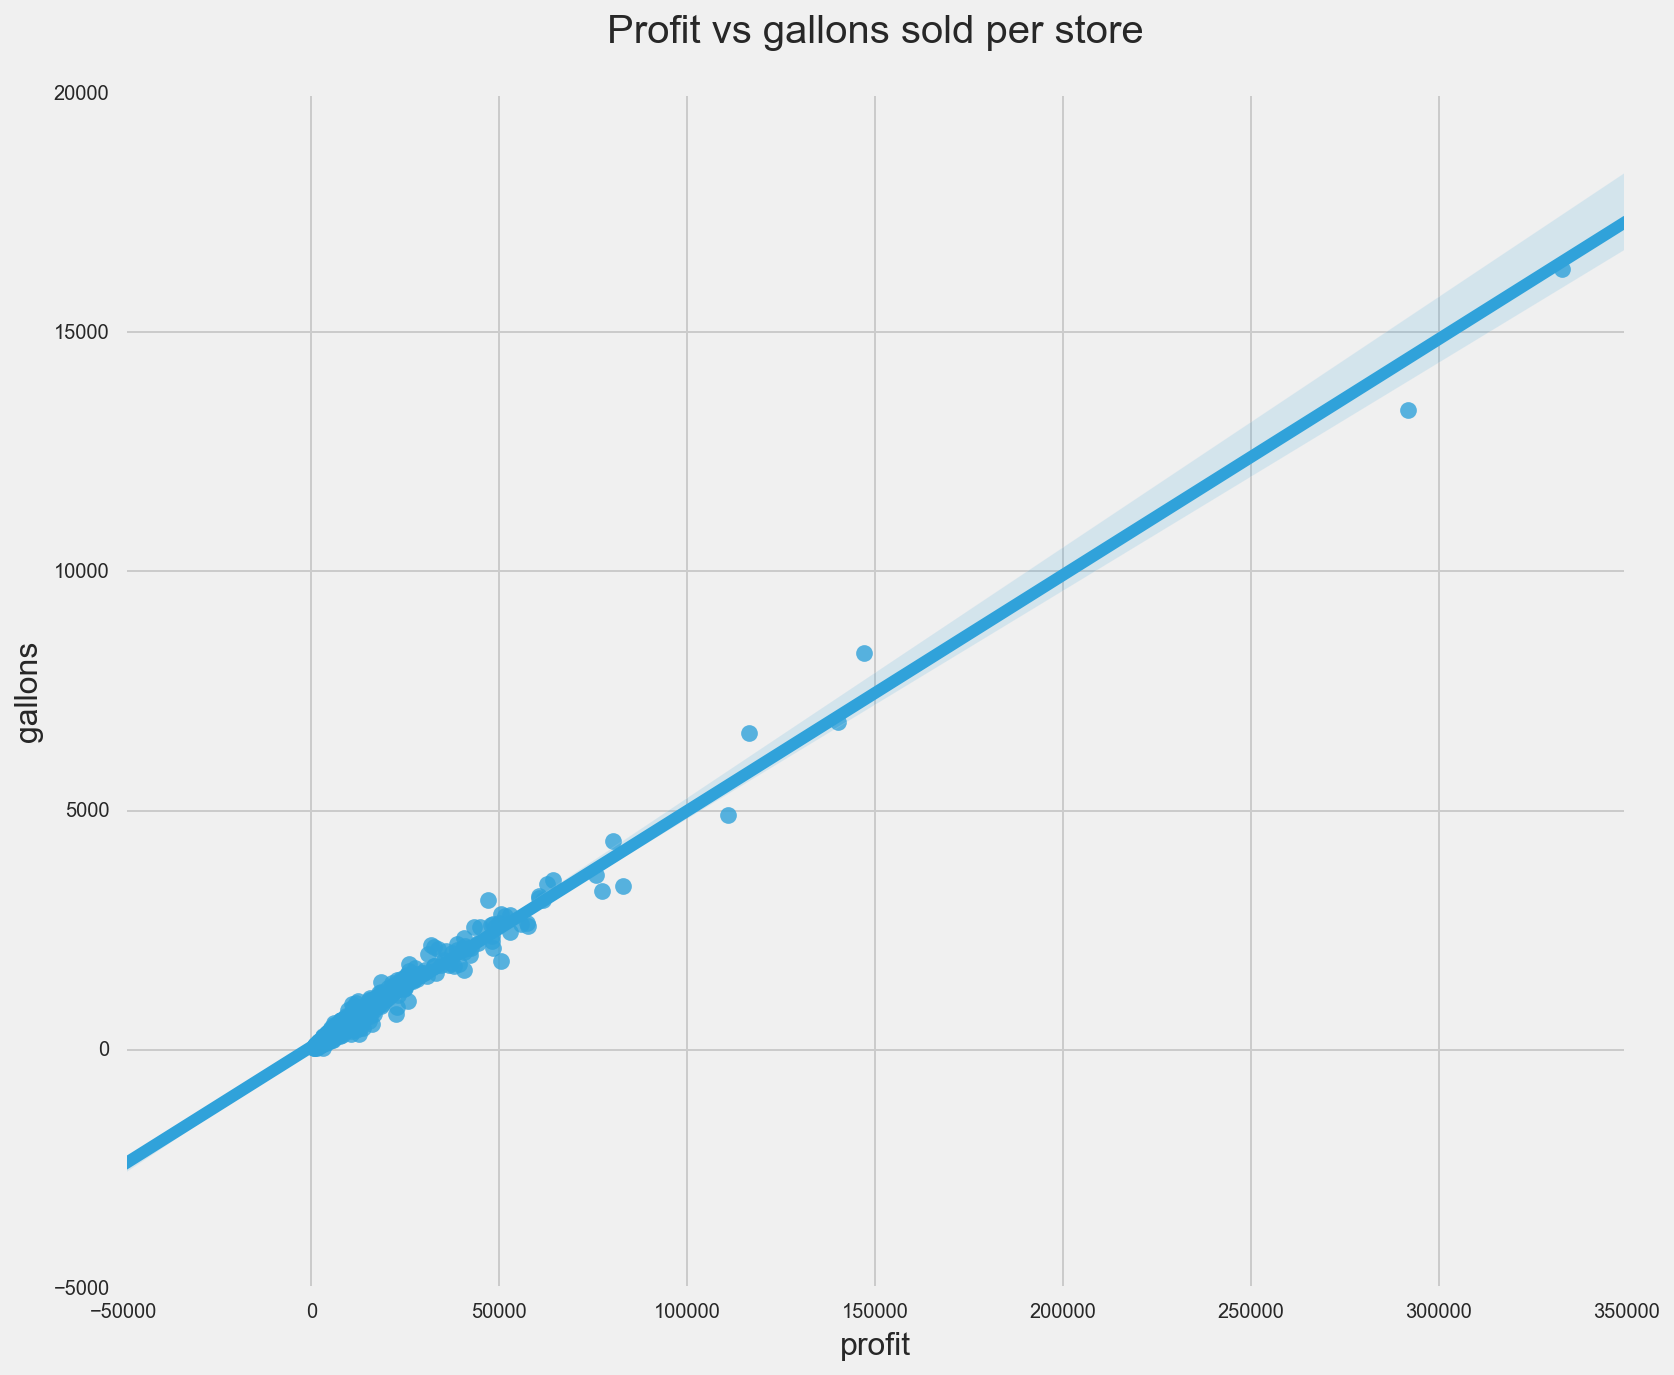

In [103]:
fig = plt.figure(figsize=(12,10))
ax = fig.gca()

profit = store_profit_gallons.profit.values
gallons = store_profit_gallons.volume_sold_gallons.values

sns.regplot(profit, gallons, ax=ax, scatter_kws={'s':70})
ax.set_xlabel('profit', fontsize=16)
ax.set_ylabel('gallons', fontsize=16)
ax.set_title('Profit vs gallons sold per store\n', fontsize=20)


In [105]:
# Chart above certainly seems to insinuate that.

# Pearson r:
print np.corrcoef(profit, gallons)

# Spearman rho:
import scipy.stats as stats
print stats.spearmanr(profit, gallons)

[[ 1.          0.99244109]
 [ 0.99244109  1.        ]]
SpearmanrResult(correlation=0.98086517449010202, pvalue=0.0)


In [ ]:
# As would be expected, the profit scales with the gallons sold.

### 5.6 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [111]:
print full_stores.category_name.unique()

['APRICOT BRANDIES' 'VODKA 80 PROOF' 'AMERICAN DRY GINS'
 'AMERICAN GRAPE BRANDIES' 'CANADIAN WHISKIES' 'CINNAMON SCHNAPPS'
 'SINGLE BARREL BOURBON WHISKIES' 'AMERICAN COCKTAILS' 'VODKA FLAVORED'
 'DISTILLED SPIRITS SPECIALTY' 'BLENDED WHISKIES' 'TEQUILA'
 'TENNESSEE WHISKIES' 'WHISKEY LIQUEUR'
 'MISC. AMERICAN CORDIALS & LIQUEURS' 'APPLE SCHNAPPS' 'CHERRY BRANDIES'
 'MISC. IMPORTED CORDIALS & LIQUEURS' 'WATERMELON SCHNAPPS'
 'BLACKBERRY BRANDIES' 'SINGLE MALT SCOTCH' 'SPICED RUM' 'IMPORTED VODKA'
 'CREAM LIQUEURS' 'SCOTCH WHISKIES' '100 PROOF VODKA'
 'STRAIGHT BOURBON WHISKIES' 'IMPORTED VODKA - MISC' 'IRISH WHISKIES'
 'IMPORTED DRY GINS' 'SPEARMINT SCHNAPPS'
 'PUERTO RICO & VIRGIN ISLANDS RUM' 'TRIPLE SEC' 'AMERICAN AMARETTO'
 'IMPORTED SCHNAPPS' 'MISCELLANEOUS  BRANDIES' 'STRAWBERRY SCHNAPPS'
 'FLAVORED RUM' 'JAMAICA RUM' 'BARBADOS RUM' 'IMPORTED GRAPE BRANDIES'
 'AMERICAN ALCOHOL' 'COFFEE LIQUEURS' 'ROOT BEER SCHNAPPS'
 'DECANTERS & SPECIALTY PACKAGES' 'PEPPERMINT SCHNAPPS' 'PEACH 

In [112]:
def make_broad_category(x):
    x = x.lower()
    if 'liqueur' in x:
        return 'liqueur'
    elif 'whisk' in x or 'scotch' in x:
        return 'whiskey'
    elif 'vodka' in x:
        return 'vodka'
    elif 'gin' in x:
        return 'gin'
    elif 'tequila' in x:
        return 'tequila'
    elif 'schnapps' in x:
        return 'schnapps'
    elif 'rum' in x:
        return 'rum'
    elif 'brandies' in x:
        return 'brandy'
    elif 'creme' in x:
        return 'creme'
    elif 'beer' in x:
        return 'beer'
    elif 'amaretto' in x:
        return 'amaretto'
    elif 'anisette' in x:
        return 'anisette'
    else:
        return 'misc'
    
full_stores['broad_category'] = full_stores.category_name.map(make_broad_category)
    

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [113]:
full_stores.head()

,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,...,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day,profit,profit_per_gallon,broad_category
0,11/04/2015,3717,sumner,50674.0,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,12,81.00,9.00,2.38,2015,11,4,27.00,11.344538,brandy
4,08/18/2015,3654,belmond,50421.0,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,12,129.60,21.00,5.55,2015,8,18,43.20,7.783784,vodka
5,04/20/2015,2569,cedar rapids,52402.0,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,...,6,119.88,10.50,2.77,2015,4,20,39.96,14.425993,gin
6,08/05/2015,2596,ottumwa,52501.0,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,...,3,29.97,2.25,0.59,2015,8,5,9.99,16.932203,brandy
7,06/25/2015,3456,clear lake,50428.0,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,...,2,47.26,3.50,0.92,2015,6,25,15.76,17.130435,whiskey


### 5.7 Do relationships exist between the broader liquor type and profit?

In [114]:
type_profit_per_gallon = full_stores.groupby('broad_category').profit_per_gallon.agg(np.mean).reset_index()

In [115]:
type_profit_per_gallon.sort_values('profit_per_gallon', ascending=False, inplace=True)
type_profit_per_gallon

# Weirdly it looks like my "beer" category is making a huge amount....

,broad_category,profit_per_gallon
2,beer,237.950000
10,tequila,37.652977
12,whiskey,26.989839
6,liqueur,26.974753
3,brandy,26.971325
8,rum,19.943924
11,vodka,18.255471
9,schnapps,17.745907
5,gin,16.925803
7,misc,15.212581


In [117]:
# turns out there are only 2 items that fall into that beer category.
full_stores[full_stores.broad_category == 'beer'].item_description

23586     Sam Adams Utopias HA
131594    Sam Adams Utopias HA
Name: item_description, dtype: object

In [119]:
# rename the beer category to be misc and recalculate the profit by type
full_stores.loc[full_stores.broad_category == 'beer', 'broad_category'] = 'misc'

type_profit_per_gallon = full_stores.groupby('broad_category').profit_per_gallon.agg(np.mean).reset_index()
type_profit_per_gallon.sort_values('profit_per_gallon', ascending=False, inplace=True)
type_profit_per_gallon


//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,broad_category,profit_per_gallon
9,tequila,37.652977
11,whiskey,26.989839
5,liqueur,26.974753
2,brandy,26.971325
7,rum,19.943924
10,vodka,18.255471
8,schnapps,17.745907
4,gin,16.925803
6,misc,15.262539
0,amaretto,14.225101


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.8 Are there any noticeable relationships between liquor brand and sales? Profit?

In [122]:
# There are a huge number of different alcohols and brands, as you can see below:
for desc in sorted(full_stores.item_description.unique()):
    print desc

10 Cane Rum
1792 Sweet Wheat HA
1800 Anejo Tequila
1800 Coconut
1800 Peach
1800 Reposado
1800 Reposado Tequila
1800 Silver
1800 Silver Tequila
1800 Ultimate Margarita
2 Gingers
2 Gingers Mini
2 Gingers w/2 Glasses
360 Bing Cherry
360 Bing Cherry Vodka
360 Double Chocolate Vodka
360 Georgia Peach Vodka
360 Madagascar Vanilla Vodka
360 Mandarin Orange Vodka
360 Vodka
44 North Huckleberry
5 year Irish Single Grain
99 Apples
99 Bananas
99 Bananas Mini
99 Blackberries
99 Cinnamon
99 Cinnamon Mini
99 Family 4-50mls
99 Peppermint
99 Peppermint Mini
99 Whipped Cream
Aberlour 12 Year Single Malt Scotch
Aberlour 16yr Scotch
Aberlour 18yr
Absente
Absolut Apeach
Absolut Berri Acai
Absolut Cherrykran
Absolut Cilantro
Absolut Citron (lemon Vodka)
Absolut Electrik
Absolut Electrik w/2 Glasses
Absolut Grapevine
Absolut Hibiskus
Absolut Kurant
Absolut Mandrin
Absolut Mango Vodka
Absolut Nightlife
Absolut Orient Apple
Absolut Pears
Absolut Peppar
Absolut Raspberri
Absolut Ruby Red
Absolut Ruby Red w/ Gr

In [124]:
full_stores.item_description.value_counts()

Black Velvet                             4644
Hawkeye Vodka                            4506
Five O'clock Vodka                       3151
Seagrams 7 Crown Bl Whiskey              2327
Captain Morgan Spiced Rum                2288
Smirnoff Vodka 80 Prf                    2278
Fireball Cinnamon Whiskey                2214
Jack Daniels Old #7 Black Lbl            2169
Absolut Swedish Vodka 80 Prf             2088
Bacardi Superior Rum                     2040
Admiral Nelson Spiced Rum                1959
Jim Beam                                 1907
Mccormick Vodka Pet                      1733
Five Star                                1726
Jagermeister Liqueur                     1656
Paramount White Rum                      1650
Crown Royal Canadian Whisky              1640
Grey Goose Vodka                         1629
Jose Cuervo Especial Reposado Tequila    1604
Uv Blue (raspberry) Vodka                1481
Southern Comfort                         1462
Malibu Coconut Rum                

In [125]:
# i won't do ALL the brands, but I can go through and make a list of a few seemingly notable ones:
brands = ['1800','Aberlour', 'Absolut', 'Admiral Nelson', 'Ardbeg', 'Arrow',
          'Auchentoshan', 'Bacardi', 'Bailey', 'Balvenie', 'Barton', 'Belvedere',
          'Bird Dog', 'Blue Chair', 'Bombay', 'Bulleit', 'Burnett', 'Seagrams',
          'Black Velvet', 'Hawkeye', 'Captain Morgan', 'Smirnoff','Fireball',
          'Jack Daniels', 'Jim Beam', 'Grey Goose', 'Macallan', 'Malibu',
          'Jose Cuervo','Southern Comfort','Jameson']



In [126]:
# I'll just look for now at unique items within the vodka category, and compare
# their mean profits per gallons:

vodkas = full_stores[full_stores.broad_category == 'vodka']
vodkas = vodkas.groupby('item_description').profit_per_gallon.agg(np.mean).reset_index()
vodkas.sort_values('profit_per_gallon', ascending=False, inplace=True)
vodkas


,item_description,profit_per_gallon
165,Outerspace Vodka Mini,134.461538
133,La Collection Flag,127.272727
103,Grey Goose VX,107.821525
132,La Collection Fish,94.428087
137,La Collection Tiger,93.400000
319,Stolichnaya Elit Vodka,75.675830
223,Purity Vodka,67.563025
66,Ciroc Pineapple Mini,65.373633
68,Ciroc Red Berry Mini,65.367993
61,Ciroc Apple Mini,65.050000


In [127]:
# Looking at this list, there is definitely a difference in the profit per gallon and the brand of vodka,
# as you would expect.

### 5.9 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [129]:
# I'm going to create 2 bins of stores: those below the 10th percentile of gallons sold and
# those above the 95th percentile of gallons sold:

stores_volume = full_stores.groupby('store_number').volume_sold_gallons.agg(np.sum).reset_index()

bottom_pctl = np.percentile(stores_volume.volume_sold_gallons, 10)
top_pctl = np.percentile(stores_volume.volume_sold_gallons, 95)

print bottom_pctl, top_pctl



94.117 2105.243


In [130]:
small_store_numbers = stores_volume[stores_volume.volume_sold_gallons < bottom_pctl].store_number
large_store_numbers = stores_volume[stores_volume.volume_sold_gallons > top_pctl].store_number

small_stores = full_stores[full_stores.store_number.isin(small_store_numbers)]
large_stores = full_stores[full_stores.store_number.isin(large_store_numbers)]

print small_stores.shape
print large_stores.shape

(4878, 24)
(35679, 24)


In [134]:
small_stores.columns

Index([u'date', u'store_number', u'city', u'zip_code', u'county_number',
       u'county', u'category', u'category_name', u'vendor_number',
       u'item_number', u'item_description', u'bottle_volume_ml',
       u'state_bottle_cost', u'state_bottle_retail', u'bottles_sold',
       u'sale_dollars', u'volume_sold_liters', u'volume_sold_gallons', u'year',
       u'month', u'day', u'profit', u'profit_per_gallon', u'broad_category'],
      dtype='object')

In [137]:
# find out what percent of liquor in each category these two types of stores sell
small_categories = small_stores.groupby('category_name')['bottles_sold'].agg(sum).reset_index()
small_categories.bottles_sold = small_categories.bottles_sold / small_categories.bottles_sold.sum()
small_categories.head()

,category_name,bottles_sold
0,100 PROOF VODKA,0.016016
1,AMERICAN ALCOHOL,0.000564
2,AMERICAN AMARETTO,0.001424
3,AMERICAN COCKTAILS,0.003737
4,AMERICAN DRY GINS,0.018745


In [138]:
large_categories = large_stores.groupby('category_name')['bottles_sold'].agg(sum).reset_index()
large_categories.bottles_sold = large_categories.bottles_sold / large_categories.bottles_sold.sum()
large_categories.head()

,category_name,bottles_sold
0,100 PROOF VODKA,0.004938
1,AMERICAN ALCOHOL,0.002271
2,AMERICAN AMARETTO,0.004931
3,AMERICAN COCKTAILS,0.021266
4,AMERICAN DRY GINS,0.017260


In [140]:
# merge them and look at where the biggest differences are:
small_categories.rename(columns={'bottles_sold':'small_store_pct'}, inplace=True)
large_categories.rename(columns={'bottles_sold':'large_store_pct'}, inplace=True)

categories_pct = small_categories.merge(large_categories, on='category_name', how='outer')
categories_pct.head()

,category_name,small_store_pct,large_store_pct
0,100 PROOF VODKA,0.016016,0.004938
1,AMERICAN ALCOHOL,0.000564,0.002271
2,AMERICAN AMARETTO,0.001424,0.004931
3,AMERICAN COCKTAILS,0.003737,0.021266
4,AMERICAN DRY GINS,0.018745,0.017260


In [142]:
categories_pct['large_store_diff'] = categories_pct.large_store_pct - categories_pct.small_store_pct
categories_pct.sort_values('large_store_diff', ascending=False, inplace=True)


In [144]:
categories_pct.head(10)

,category_name,small_store_pct,large_store_pct,large_store_diff
48,TEQUILA,0.019605,0.070500,0.050895
27,IMPORTED VODKA - MISC,0.002907,0.027025,0.024118
3,AMERICAN COCKTAILS,0.003737,0.021266,0.017529
49,TRIPLE SEC,0.000445,0.016533,0.016088
20,FLAVORED RUM,0.011182,0.026954,0.015773
28,IRISH WHISKIES,0.002017,0.016949,0.014932
25,IMPORTED SCHNAPPS,0.006199,0.018704,0.012505
16,CREAM LIQUEURS,0.007771,0.020072,0.012301
23,IMPORTED DRY GINS,0.001661,0.013444,0.011783
36,PUERTO RICO & VIRGIN ISLANDS RUM,0.031617,0.043112,0.011494


In [145]:
categories_pct.tail(20)

,category_name,small_store_pct,large_store_pct,large_store_diff
24,IMPORTED GRAPE BRANDIES,0.020821,0.007650,-0.013171
43,SPICED RUM,0.083284,0.065660,-0.017624
5,AMERICAN GRAPE BRANDIES,0.029956,0.009698,-0.020258
53,WHISKEY LIQUEUR,0.064865,0.044362,-0.020503
12,CANADIAN WHISKIES,0.152302,0.084193,-0.068109
50,VODKA 80 PROOF,0.283219,0.156020,-0.127198
54,AMERICAN SLOE GINS,NaN,0.000205,NaN
55,ANISETTE,NaN,0.000093,NaN
56,BARBADOS RUM,NaN,0.001082,NaN
57,CORN WHISKIES,NaN,0.000002,NaN


In [146]:
# My recommendations would be:
# 1. Tax tequila, imported vodkas, and american cocktails more, since large
# stores are selling them more than small.
# 2. Tax 80 proof vodka, canadian whiskey, and whiskey liqueur less, since
# small stores are selling them more than large stores.
# 3. (possibly) tax things that large stores are selling and small stores
# are currently not. However, probably not since these don't make up much
# of the sales for large stores anyway.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Market research for new store locations (Scenario 2)

A liquor store owner in Iowa is looking to open a store in a new location and has hired you to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [165]:
# Select the quarter periods
mask2015 = (iowa.month.isin([1,2,3])) & (iowa.year == 2015)
mask2016 = (iowa.month.isin([1,2,3])) & (iowa.year == 2016)

iowa_q1_2015 = iowa[mask2015]
iowa_q1_2016 = iowa[mask2016]

print iowa_q1_2015.shape
print iowa_q1_2016.shape

(49705, 22)
(50910, 22)


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [166]:
iowa_q1_2015.head()

,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,...,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day,broad_category
12,01/22/2015,3858,davenport,52806.0,82.0,Scott,1012100.0,CANADIAN WHISKIES,65,15248,...,8.92,13.38,1,13.38,1.75,0.46,2015,1,22,whiskey
19,03/04/2015,2614,davenport,52807.0,82.0,Scott,1012100.0,CANADIAN WHISKIES,434,13638,...,9.97,14.96,6,89.76,10.50,2.77,2015,3,4,whiskey
20,01/16/2015,2590,cedar rapids,52402.0,57.0,Linn,1031200.0,VODKA FLAVORED,971,41474,...,14.25,21.38,2,42.76,1.50,0.40,2015,1,16,vodka
21,01/13/2015,3942,toledo,52342.0,86.0,Tama,1012100.0,CANADIAN WHISKIES,115,11786,...,5.23,7.85,12,94.20,9.00,2.38,2015,1,13,whiskey
22,03/24/2015,3981,sioux center,51250.0,84.0,Sioux,1011100.0,BLENDED WHISKIES,260,25606,...,7.00,10.50,12,126.00,9.00,2.38,2015,3,24,whiskey


In [167]:
# I'll do total sales per store for each area (counties, for simplicity. fine if city is chosen).
q1_2015 = iowa_q1_2015.groupby(['store_number','county']).sale_dollars.agg(np.sum).reset_index()
q1_2015 = q1_2015.groupby('county').sale_dollars.agg(np.mean).reset_index()
print q1_2015.head()

q1_2016 = iowa_q1_2016.groupby(['store_number','county']).sale_dollars.agg(np.sum).reset_index()
q1_2016 = q1_2016.groupby('county').sale_dollars.agg(np.mean).reset_index()
print q1_2016.head()


      county  sale_dollars
0      Adair   1277.750000
1      Adams   2253.600000
2  Allamakee   2484.663333
3  Appanoose   2538.015000
4    Audubon   2755.375000
      county  sale_dollars
0      Adair   1685.288571
1      Adams   2196.570000
2  Allamakee   3180.255000
3  Appanoose   3566.038333
4    Audubon   1613.140000


In [168]:
# Combine the two into one dataframe:
q1_2015.rename(columns={'sale_dollars':'sales_per_store_2015'}, inplace=True)
q1_2016.rename(columns={'sale_dollars':'sales_per_store_2016'}, inplace=True)

q1_15to16 = q1_2015.merge(q1_2016, on='county')
q1_15to16.head()

,county,sales_per_store_2015,sales_per_store_2016
0,Adair,1277.750000,1685.288571
1,Adams,2253.600000,2196.570000
2,Allamakee,2484.663333,3180.255000
3,Appanoose,2538.015000,3566.038333
4,Audubon,2755.375000,1613.140000


In [169]:
# Calculate the difference between q1 2016 and q1 2015 as pct increase
q1_15to16['pct_increase'] = q1_15to16.sales_per_store_2016/q1_15to16.sales_per_store_2015
q1_15to16.head()

,county,sales_per_store_2015,sales_per_store_2016,pct_increase
0,Adair,1277.750000,1685.288571,1.318950
1,Adams,2253.600000,2196.570000,0.974694
2,Allamakee,2484.663333,3180.255000,1.279954
3,Appanoose,2538.015000,3566.038333,1.405050
4,Audubon,2755.375000,1613.140000,0.585452


In [176]:
# The storeowner is particularly concerned with lack of growth potential,
# so any area that is declining in growth will not even be considered. 
recs = q1_15to16[q1_15to16.pct_increase > 1.]

# The metric should be a combination of both. I'll use a 5-year projection 
# where the recommendation will be based on how many sales the store will 
# have in Q1 5 years from now based on 2016 sales and growth estimate.
recs['5yr_q1_estimate'] = recs.sales_per_store_2016 * (recs.pct_increase**5)
recs.sort_values('5yr_q1_estimate', ascending=False, inplace=True)
recs.head(10)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,county,sales_per_store_2015,sales_per_store_2016,pct_increase,5yr_q1_estimate
23,Crawford,3510.266667,7506.200000,2.138356,335598.677621
97,Worth,2015.416667,3935.970000,1.952931,111811.493642
15,Cedar,1240.208750,2473.068750,1.994075,77972.809461
14,Cass,2308.604444,3473.282500,1.504494,26772.751804
11,Butler,670.638571,1226.180000,1.828377,25054.326271
32,Fayette,2567.117500,3741.063000,1.457301,24589.029871
3,Appanoose,2538.015000,3566.038333,1.405050,19527.431432
58,Lucas,4336.310000,5571.495000,1.284847,19508.723807
85,Tama,2592.584000,3487.804000,1.345300,15369.093266
51,Johnson,6574.348980,7488.174167,1.138999,14354.625099


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [215]:
# Crawford is the place to be.
# It has a very high sales per store in Q1 2016, and it has seen a 213% increase in sales
# since Q1 2015.

## NOTE:
## THERE IS ACTUALLY AN OUTLIER IN CRAWFORDS DATA CAUSING THIS TO BE THE BEST,
## WHICH I DID NOT ORIGINALLY CATCH!!!
## BECAUSE I DIDNT DO DUE DILIGENCE AND FIND THE OUTLIER, I MADE THE WRONG
## RECOMMENDATION!
## (Always look at the data - It's easy to forget and I screw it up too.)

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [178]:
# We saw earlier that tequila gets the best profit-per-gallon of any liquor.

# One easy way we could do this is check to see what percent of sales in 2016
# in these counties were tequila sales, then adjust our estimates based on 
# that.
iowa['broad_category'] = iowa.category_name.map(make_broad_category)

def sum_tequila(df):
    df['tequila_sales_2016'] = df[df.broad_category == 'tequila'].sale_dollars.sum()
    return df

iowa_q1_2016 = iowa[mask2016]
q1_2016 = iowa_q1_2016.groupby(['county','store_number']).apply(sum_tequila).reset_index()
q1_2016 = q1_2016.groupby('county').tequila_sales_2016.agg(np.mean).reset_index()

recs = recs.merge(q1_2016, on='county', how='inner')

recs['5yr_tequila_est'] = recs['5yr_q1_estimate'] * (recs.tequila_sales_2016 / recs.sales_per_store_2016)
recs.sort_values('5yr_tequila_est', ascending=False, inplace=True)
recs.head(10)

,county,sales_per_store_2015,sales_per_store_2016,pct_increase,5yr_q1_estimate,tequila_sales_2016,5yr_tequila_est
0,Crawford,3510.266667,7506.200000,2.138356,335598.677621,1080.575161,48312.008100
1,Worth,2015.416667,3935.970000,1.952931,111811.493642,357.254483,10148.745373
5,Fayette,2567.117500,3741.063000,1.457301,24589.029871,737.568881,4847.847590
9,Johnson,6574.348980,7488.174167,1.138999,14354.625099,2486.334560,4766.235358
6,Appanoose,2538.015000,3566.038333,1.405050,19527.431432,793.964920,4347.708600
20,Polk,7114.794043,7275.387487,1.022572,8134.392215,2654.598268,2968.026586
3,Cass,2308.604444,3473.282500,1.504494,26772.751804,343.670796,2649.082802
2,Cedar,1240.208750,2473.068750,1.994075,77972.809461,70.612784,2226.334029
8,Tama,2592.584000,3487.804000,1.345300,15369.093266,351.891429,1550.618150
7,Lucas,4336.310000,5571.495000,1.284847,19508.723807,374.069647,1309.813870


In [179]:
# With this adjustment Crawford still looks like the best place. 
# There are smarter ways to figure this out - i'm not convinced in my
# way to "convert" these places into only tequila sales, but it works
# for the point of this project.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 3 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


In [180]:
# 1. We showed earlier that sales for liquor are highest is december:
mean_std_permonth

# which is no surprise.

,month,sale_dollars,store_ests
0,1,-0.258322,2330.135709
1,2,-0.287915,2237.165431
2,3,-0.039697,3016.993085
3,4,-0.074613,2907.297930
4,5,-0.153359,2659.899846
5,6,0.246022,3914.640423
6,7,0.016443,3193.369332
7,8,-0.089639,2860.089845
8,9,0.008079,3167.090624
9,10,0.032867,3244.967150


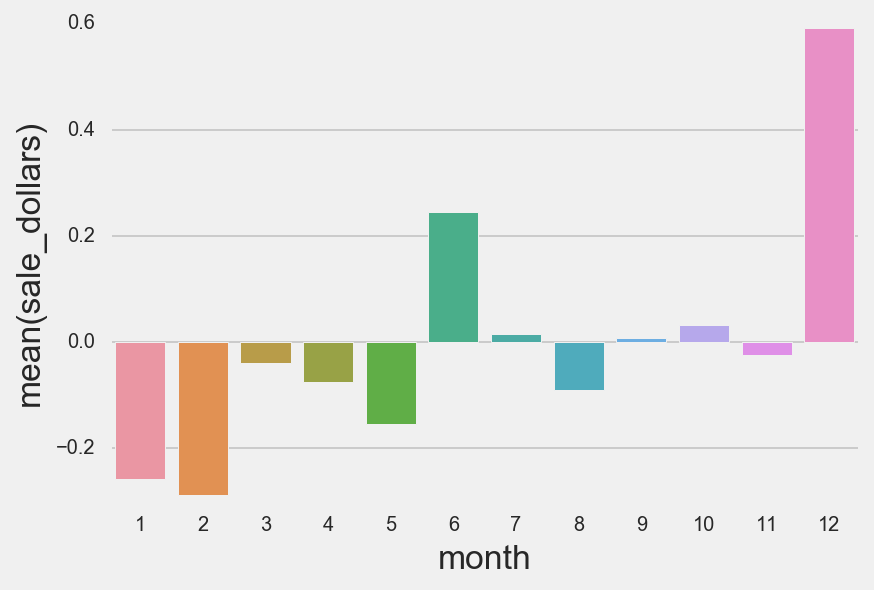

In [181]:
sns.barplot(x='month', y='sale_dollars', data=mean_std_permonth)

In [182]:
# 2. People buy the least amount of liquor on tuesdays.

# Make a datetime column and pull out tuesdays
iowa['date'] = iowa.date.map(lambda x: '-'.join(x.split('/')))
iowa['date'] = pd.to_datetime(iowa.date)

In [185]:
iowa['day_of_week'] = iowa.date.dt.weekday_name

In [187]:
avg_sales_perday = iowa.groupby('day_of_week').sale_dollars.agg(np.mean).reset_index()
avg_sales_perday

,day_of_week,sale_dollars
0,Friday,155.307583
1,Monday,137.993379
2,Saturday,124.926792
3,Thursday,141.916032
4,Tuesday,117.543676
5,Wednesday,120.967819


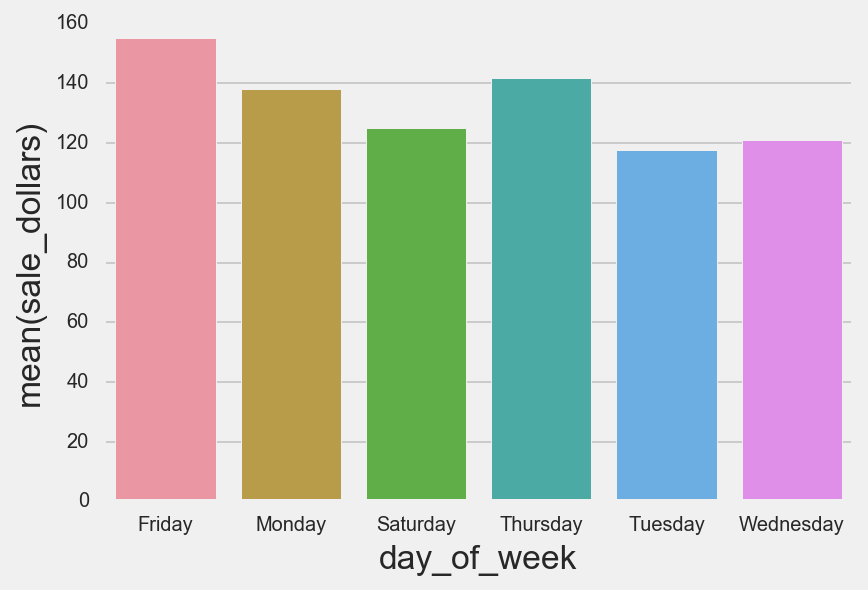

In [188]:
sns.barplot(x='day_of_week', y='sale_dollars', data=avg_sales_perday)

# It's true. Tuesday is the least appealing time to buy alcohol. I guess
# you can't buy alchohol on Sundays in Iowa.)

In [190]:
# 3. People buy more alcohol around the time they get paid. (1st and 15th 
# of the month)
avg_sales_daymonth = iowa.groupby('day').sale_dollars.agg(np.mean).reset_index()
avg_sales_daymonth.sale_dollars = avg_sales_daymonth.sale_dollars - avg_sales_daymonth.sale_dollars.mean()
avg_sales_daymonth.sort_values('day', ascending=True)

,day,sale_dollars
0,1,10.568700
1,2,2.458691
2,3,-5.909500
3,4,4.251436
4,5,3.386378
5,6,-9.884605
6,7,-1.041397
7,8,-6.206173
8,9,2.554781
9,10,-2.184777


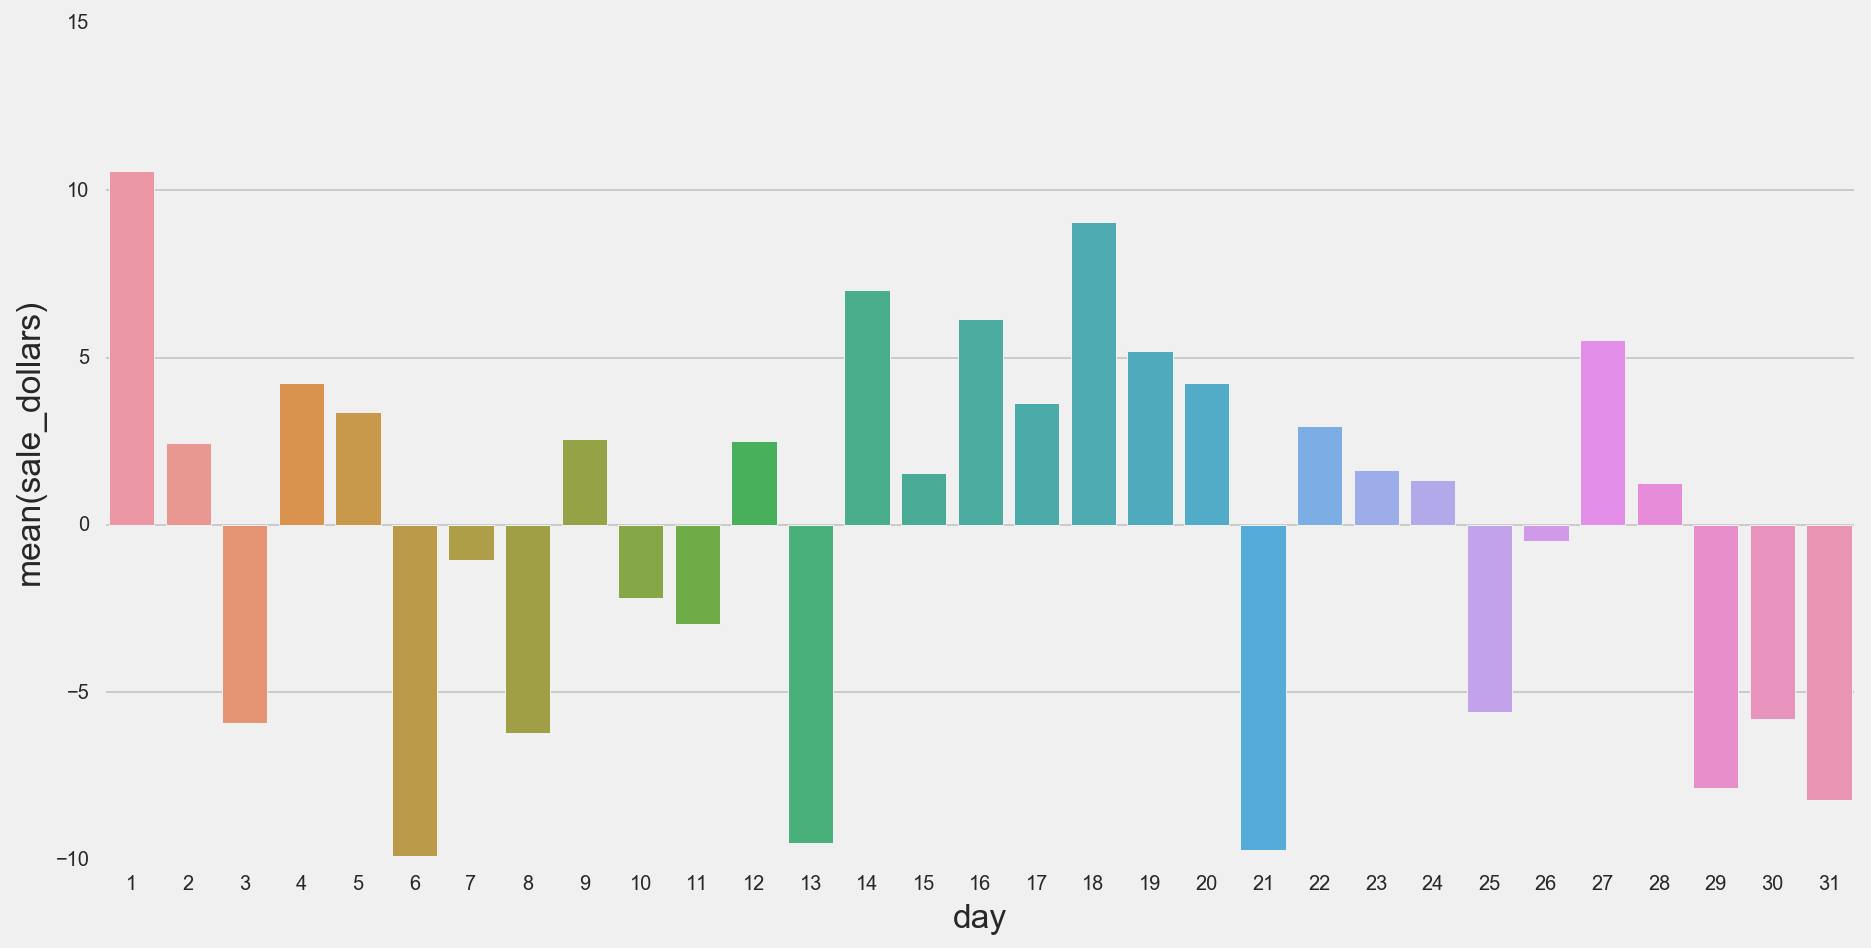

In [191]:
# mean deviated sales per day of month:

fig = plt.figure(figsize=(14,7))
ax = fig.gca()

sns.barplot(x='day', y='sale_dollars', data=avg_sales_daymonth, ax=ax)

In [192]:
# People seem to buy the most on the first... but there are some other weird trends in 
# there that don't make immediate sense, and make me skeptical that there are some
# other important factors that I'd need to control for here before taking this chart
# at face value.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Appropriate spending

---

The owner you worked with before realized that opening new stores cost money, something he had completely overlooked earlier. He brings you back in to help him figure out how much he should be willing to spend on opening his store.

### 8.1 Calculate costs and time to recoup.

The owner has decided he will buy 20,000 gallons of the liquor type you recommended (randomly sampled across the different brands/subtypes). He will also be opening his store in the area you recommended.

The cost of buying the property for his store will be $150,000.

1. How much should he expect to spend on the 20,000 gallons of liquor alone?
2. Based on the amount he's spent on the liquor and property, and on the profit per time period he is expected to have, how long will it take him to recoup the costs?

In [194]:
# He'll be buying tequila. I'm just going to use prices per gallon for tequila
# in Q1 2016, in case the prices have changed since last year.
iowa_q1_2016 = iowa[mask2016]
tequila = iowa_q1_2016[iowa_q1_2016.broad_category == 'tequila']
tequila_costs = tequila[['state_bottle_cost','bottles_sold','volume_sold_gallons']]
tequila_costs.head()

,state_bottle_cost,bottles_sold,volume_sold_gallons
128,10.49,12,2.38
180,3.00,48,2.54
352,9.99,3,0.30
514,27.00,2,0.40
560,12.50,7,1.85


In [195]:
tequila_costs['cost_pg'] = (tequila_costs.state_bottle_cost * tequila_costs.bottles_sold) / tequila_costs.volume_sold_gallons
tequila_costs.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,state_bottle_cost,bottles_sold,volume_sold_gallons,cost_pg
128,10.49,12,2.38,52.890756
180,3.00,48,2.54,56.692913
352,9.99,3,0.30,99.900000
514,27.00,2,0.40,135.000000
560,12.50,7,1.85,47.297297


In [199]:
cost_20k_gal = np.sum(np.random.choice(tequila_costs.cost_pg.values, replace=True, size=20000))
cost_20k_gal

1469564.3825609726

In [200]:
total_costs = cost_20k_gal + 150000
total_costs

1619564.3825609726

In [202]:
# what's the average sales per quarter in crawford?
crawford = iowa_q1_2016[iowa_q1_2016.county == 'Crawford']
crawford_perstore = crawford.groupby('store_number').sale_dollars.agg(np.sum).reset_index()
crawford_mean = crawford_perstore.sale_dollars.mean()
crawford_mean


7506.200000000002

In [209]:
# years to recoup:
# THIS IS IF THE CRAZY 2.138 GROWTH RATE MAINTAINS OVER ALL YEARS!!
growth = 2.138356
over_time_sales = pd.DataFrame({'year':np.arange(1,100)})
over_time_sales['total_sales'] = [crawford_mean * (growth**y) for y in np.arange(1,100)]
over_time_sales['paid_back'] = over_time_sales.total_sales <= total_costs
over_time_sales.head(10)

,year,total_sales,paid_back
0,1,1.605093e+04,True
1,2,3.432260e+04,True
2,3,7.339393e+04,True
3,4,1.569424e+05,True
4,5,3.355986e+05,True
5,6,7.176293e+05,True
6,7,1.534547e+06,True
7,8,3.281408e+06,False
8,9,7.016818e+06,False
9,10,1.500446e+07,False


In [210]:
# With the insane growth rate expected from Crawford, he will have recouped 
# the costs in 8 years.

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">


### 8.2 Calculate maximum loan interest rate.

The owner unfortunately has to take out a loan to to pay for the entirety of the property and liquor. 

**Conditions of the loan**:

Every quarter, (except for Q1 when he takes out the loan), the interest rate is applied to the remaining balance on the loan and added to his debt. 

If, for example, he made no payments whatsoever, not only would the amount of debt he owed keep increasing by quarter but the debt incurred from interest would keep increasing as well. (Since his debt keeps growing, the interest rate is applied each month to the bigger balance, incurring more debt each time.)

**Determining maximum acceptable interest:**

Given this, _the owner wants to be 99% confident that he will be able to pay off his loans._ If the interest rate is too high he will have to eventually declare bankruptcy.

Based on his expected profits per quarter (assume the expected profit stays the same for all future quarters), what is the maximum interest rate he should accept on the loan to be 99% confident he will be able to pay it off?

In [211]:
# I should have been clearer in the description here:
# I say to assume expected profits stays the same - 
# this means don't take the growth rate into account since it makes things
# more complicated. Just use that expected profit (sales since he already
# paid for all the liquour up front) for a quarter in Crawford.
#
# The thing I should have made clear is that the "expected profit" should
# behave like a random variable. It won't just be the same amount every
# quarter, but the expected value will be the same. In this case, I'm
# going to calculate a standard deviation of sales per quarter in 
# crawford.
#
# Since I didn't make my intentions for this question nearly clear
# enough, I realize it was kind of impossible to do. I will read over
# more carefully in the future.
#

In [223]:
# Get a mean and standard deviation of sales in Crawford using the
# daily sales in Q1 to estimate it.
crawford_est = crawford.groupby(['month','day']).sale_dollars.agg(np.sum).reset_index()
crawford_est_sum = crawford.sale_dollars.sum()/len(crawford.store_number.unique())
crawford_est_daily = crawford_est_sum/(31*3.)
crawford_est_std = crawford.sale_dollars.std()

print crawford_est_sum, crawford_est_daily, crawford_est_std

7506.2 80.711827957 1279.108563


In [216]:
# The big outlier in Crawford's data is causing a big standard deviation.
# This is the outlier I meantioned before that I didn't check for, making
# my answer for recommending crawford wrong. I didn't look at the data
# and paid the price of giving a bad recommendation!
#
# Regardless, I'll keep this huge standard deviation in here because it'll
# be interesting in its own right. Maybe there is some gigantic spender
# in crawford that every now and then buys a huge amount of alcohol.
# This will be part of the uncertainty on the owner paying back his loans.

In [220]:
crawford_est

,month,day,sale_dollars
0,1,6,23.63
1,1,7,2725.19
2,1,13,16.50
3,1,14,981.39
4,1,20,244.95
5,1,21,742.50
6,1,27,53.63
7,1,28,892.80
8,2,3,14.57
9,2,4,2256.24


In [236]:
# There were only 24 reported sales for the whole quarter. I will 
# pad the other days as zero sales when I draw the sales at random.

In [240]:
sales_vec = np.zeros(31*3)
sales_vec[0:25] = crawford_est.sale_dollars.values
sales_vec[0:30]

array([  2.36300000e+01,   2.72519000e+03,   1.65000000e+01,
         9.81390000e+02,   2.44950000e+02,   7.42500000e+02,
         5.36300000e+01,   8.92800000e+02,   1.45700000e+01,
         2.25624000e+03,   1.72440000e+02,   2.44216000e+03,
         5.54200000e+01,   6.58920000e+02,   1.55760000e+02,
         1.82322300e+04,   2.38800000e+02,   1.58189000e+03,
         2.45500000e+02,   1.67731000e+03,   1.98400000e+02,
         1.27128000e+03,   7.75850000e+02,   6.08000000e+00,
         1.86756000e+03,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00])

In [259]:
# I'll do this via simulation:
# 1. For each interest rate, run 1000 simulations of the owners business
# over time.
# 2. Each simulation will run for 400 quarters (100 years to pay it off).


# use a gamma distribution to model how much money is made per day
# (always positive):
# https://en.wikipedia.org/wiki/Gamma_distribution
def simulate_quarter_sales(sales_vec):
    return np.sum(np.random.choice(sales_vec, replace=True, size=93))

def calculate_new_debt(debt, rate):
    return debt*rate

def diminish_debt(debt, sales):
    return debt-sales

def simulate_years(rate, total_costs, sales_vec):
    paid_debt = 0
    quarterly_debt = [total_costs]
    while len(quarterly_debt) < 401:
        sales = simulate_quarter_sales(sales_vec)
        debt = diminish_debt(quarterly_debt[-1], sales)
        if debt <= 0:
            paid_debt = 1
            break
        if (debt*rate - debt) >= np.max(sales_vec)*93:
            break
        quarterly_debt.append(calculate_new_debt(debt, rate))
    return paid_debt

def run_simulations(rates, total_costs, sales_vec):
    rates_paid = pd.DataFrame({'rate':rates})
    sims_paid = []
    for r in rates:
        print r
        sims = np.mean([simulate_years(r, total_costs, sales_vec) for i in range(1000)])*100.
        sims_paid.append(sims)
    rates_paid['pct_sims_paid'] = sims_paid
    return rates_paid
        
        
    

In [260]:
rates_paid = run_simulations(np.linspace(1.0,1.05,100), total_costs, sales_vec)

1.0
1.00050505051
1.00101010101
1.00151515152
1.00202020202
1.00252525253
1.00303030303
1.00353535354
1.00404040404
1.00454545455
1.00505050505
1.00555555556
1.00606060606
1.00656565657
1.00707070707
1.00757575758
1.00808080808
1.00858585859
1.00909090909
1.0095959596
1.0101010101
1.01060606061
1.01111111111
1.01161616162
1.01212121212
1.01262626263
1.01313131313
1.01363636364
1.01414141414
1.01464646465
1.01515151515
1.01565656566
1.01616161616
1.01666666667
1.01717171717
1.01767676768
1.01818181818
1.01868686869
1.01919191919
1.0196969697
1.0202020202
1.02070707071
1.02121212121
1.02171717172
1.02222222222
1.02272727273
1.02323232323
1.02373737374
1.02424242424
1.02474747475
1.02525252525
1.02575757576
1.02626262626
1.02676767677
1.02727272727
1.02777777778
1.02828282828
1.02878787879
1.02929292929
1.0297979798
1.0303030303
1.03080808081
1.03131313131
1.03181818182
1.03232323232
1.03282828283
1.03333333333
1.03383838384
1.03434343434
1.03484848485
1.03535353535
1.03585858586
1.036363

In [262]:
rates_paid.iloc[25:50,:]

,rate,pct_sims_paid
25,1.012626,100.0
26,1.013131,100.0
27,1.013636,100.0
28,1.014141,100.0
29,1.014646,100.0
30,1.015152,100.0
31,1.015657,100.0
32,1.016162,100.0
33,1.016667,100.0
34,1.017172,100.0


In [ ]:
# Looks likke if it goes above 1.02 then confidence drops below 99%.